In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
newdf = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis ='columns')

newdf.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
target = df[('Survived')]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_sex = LabelEncoder()

In [7]:
newdf['sex_n'] = le_sex.fit_transform(newdf['Sex'])
newdf.head()

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [8]:
newdf = newdf.drop(['Sex'], axis = 'columns')
newdf.head()

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [9]:
newdf.describe()

,Survived,Pclass,Age,Fare,sex_n
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.647587
std,0.486592,0.836071,14.526497,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


In [23]:
newdf.groupby('Survived').mean()

,Pclass,Age,Fare,sex_n
Survived,,,,
0,2.531876,30.626179,22.117887,0.852459
1,1.950292,28.343690,48.395408,0.318713


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

,Survived,Pclass,Age,Fare,sex_n
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,0.096067,0.093254
Fare,0.257307,-0.549500,0.096067,1.000000,-0.182333
sex_n,-0.543351,0.131900,0.093254,-0.182333,1.000000


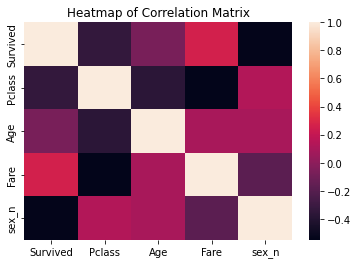

In [11]:
corr = newdf.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

<AxesSubplot:xlabel='Sex'>

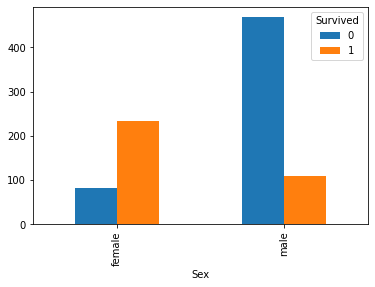

In [12]:
pd.crosstab(df.Sex , df.Survived).plot(kind = 'bar')

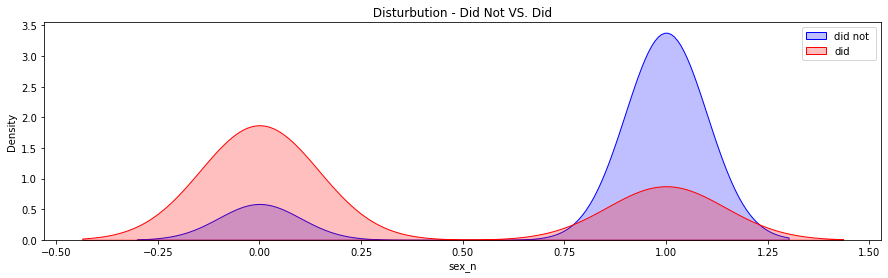

In [22]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 0), 'sex_n'], color = 'b', fill =True, label = 'did not ')
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 1), 'sex_n'], color = 'r', fill =True, label = 'did' )
plt.title(' Disturbution - Did Not VS. Did ')
plt.legend()
plt.show()

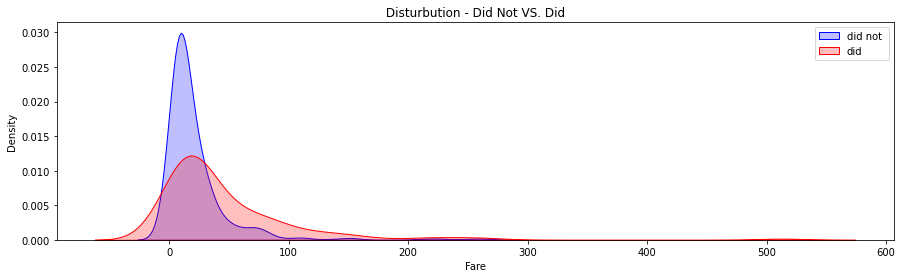

In [24]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 0), 'Fare'], color = 'b', fill =True, label = 'did not ')
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 1), 'Fare'], color = 'r', fill =True, label = 'did' )
plt.title(' Disturbution - Did Not VS. Did ')
plt.legend()
plt.show()

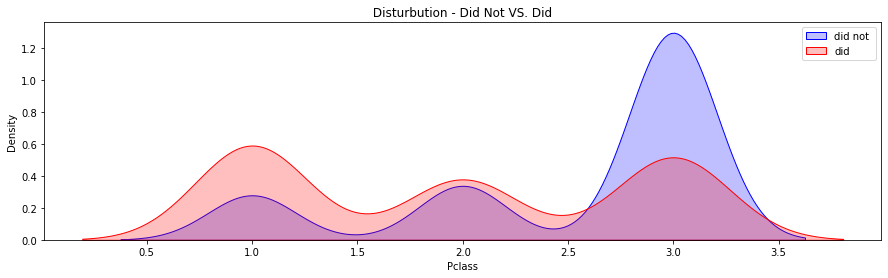

In [25]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 0), 'Pclass'], color = 'b', fill =True, label = 'did not ')
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 1), 'Pclass'], color = 'r', fill =True, label = 'did' )
plt.title(' Disturbution - Did Not VS. Did ')
plt.legend()
plt.show()

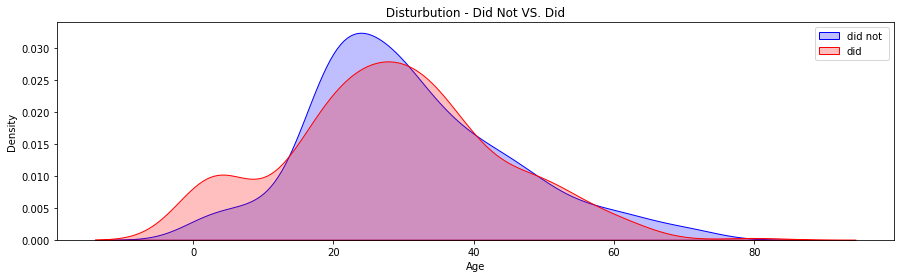

In [26]:
fig = plt.figure(figsize = (15, 4),)
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 0), 'Age'], color = 'b', fill =True, label = 'did not ')
ax = sns.kdeplot(newdf.loc[(df['Survived'] == 1), 'Age'], color = 'r', fill =True, label = 'did' )
plt.title(' Disturbution - Did Not VS. Did ')
plt.legend()
plt.show()

In [31]:
newdf = newdf.drop(['Survived'], axis = 'columns')
newdf.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [53]:
newdf = newdf.fillna(newdf.Age.median())

In [54]:
X = newdf
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [65]:
a = model.fit(X_train,y_train)

In [66]:
model.score(X_test, y_test)

0.8395522388059702

[Text(0.5, 0.875, 'X[3] <= 0.5\nentropy = 0.959\nsamples = 623\nvalue = [385, 238]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\nentropy = 0.864\nsamples = 220\nvalue = [63, 157]'),
 Text(0.125, 0.375, 'X[2] <= 26.125\nentropy = 0.337\nsamples = 112\nvalue = [7, 105]'),
 Text(0.0625, 0.125, 'entropy = 0.562\nsamples = 38\nvalue = [5, 33]'),
 Text(0.1875, 0.125, 'entropy = 0.179\nsamples = 74\nvalue = [2, 72]'),
 Text(0.375, 0.375, 'X[2] <= 22.904\nentropy = 0.999\nsamples = 108\nvalue = [56, 52]'),
 Text(0.3125, 0.125, 'entropy = 0.982\nsamples = 88\nvalue = [37, 51]'),
 Text(0.4375, 0.125, 'entropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(0.75, 0.625, 'X[2] <= 15.646\nentropy = 0.724\nsamples = 403\nvalue = [322, 81]'),
 Text(0.625, 0.375, 'X[1] <= 13.5\nentropy = 0.515\nsamples = 252\nvalue = [223, 29]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.472\nsamples = 248\nvalue = [223, 25]'),
 Text(0.875, 0.375, 'X[1] <= 57.0\nentrop

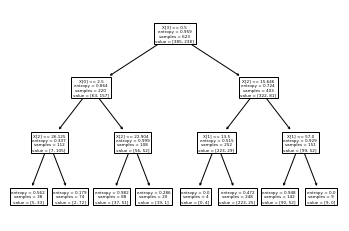

In [67]:
#tree.plot_tree(a)

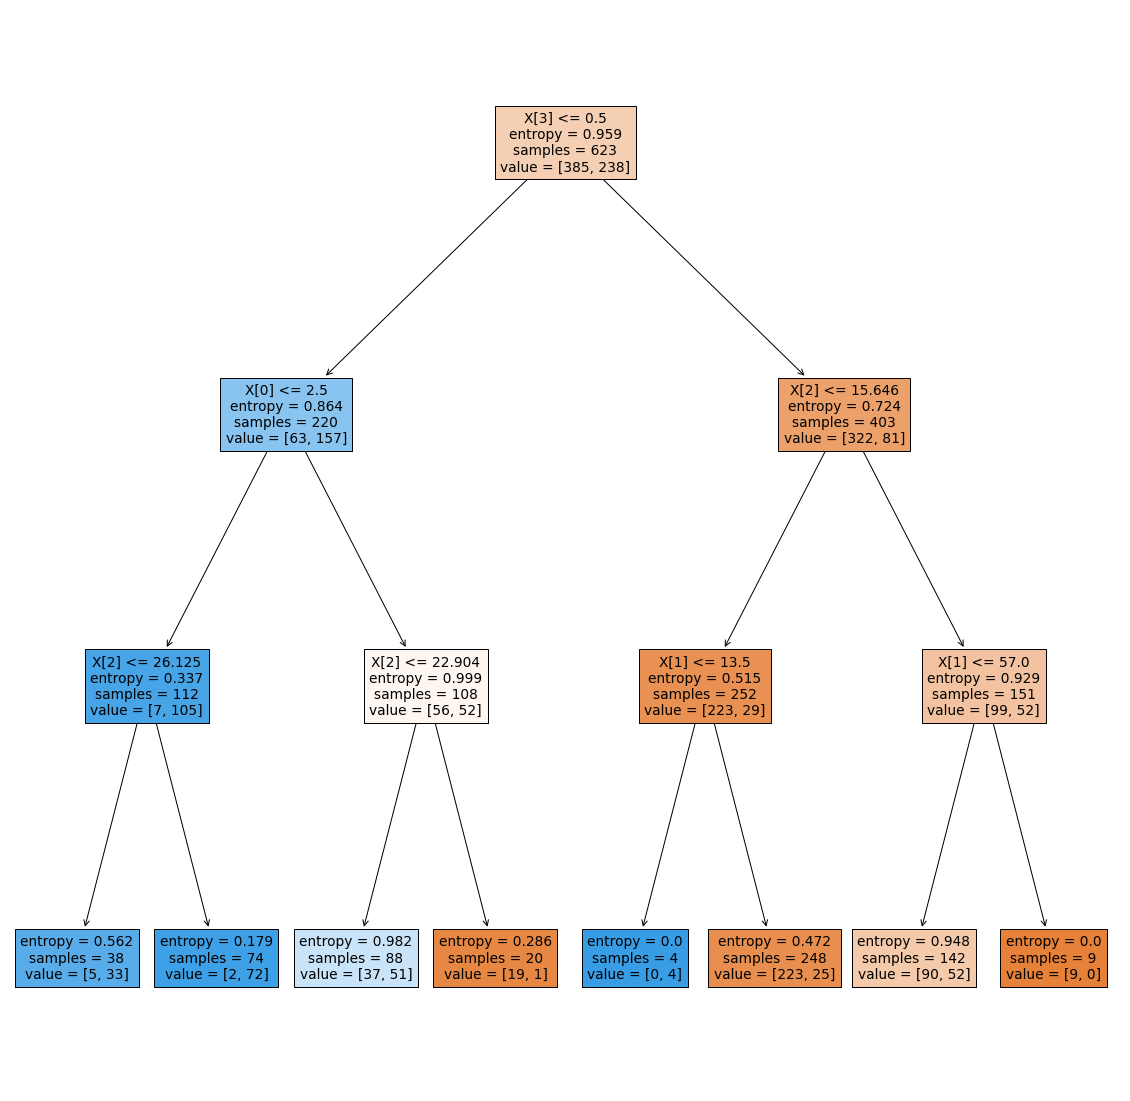

In [78]:
#from sklearn.tree import plot_tree

tree.plot_tree
plt.figure(figsize=(20,20))
plot_tree(a, filled=True)

plt.show()